### __Ejemplos de ingeniería de características:__ 

### __clasificación de características numéricas__

##### Cómo utilizar NumPy o Pandas para clasificar rápidamente características numéricas

Max Steele

https://towardsdatascience.com/feature-engineering-examples-binning-numerical-features-7627149093d


La ingeniería de características se centra en utilizar las variables ya presentes en su conjunto de datos para crear características adicionales que ( con suerte ) representen mejor la estructura subyacente de sus datos.

Por ejemplo, el rendimiento de su modelo puede verse beneficiado por la clasificación de características numéricas . Esto significa, básicamente, dividir las características numéricas continuas u otras en grupos distintos. Al aplicar el conocimiento del dominio, puede diseñar categorías y características que resalten mejor las tendencias importantes en sus datos.

En esta publicación, analizaremos tres métodos diferentes para clasificar características numéricas con ejemplos específicos utilizando NumPy y Pandas. Diseñaremos características a partir de un conjunto de datos con información sobre la participación y la demografía de los votantes. Seleccioné dos variables numéricas con las que trabajar:

age: la edad de un votante registrado al final del año electoral
birth_year: el año en que nació un votante registrado
Si desea comenzar a aplicar estos métodos a sus propios proyectos, solo tendrá que asegurarse de tener instalados NumPy y Pandas y luego importar ambos.

In [1]:
import pandas as pd
import numpy as np

#### Uso de np.where() para indicar umbrales

Puede resultar extraño pensarlo, pero indicar si cada instancia (en este caso, cada votante registrado) cumple un determinado umbral es una especie de clasificación.

Por ejemplo, imaginemos que estamos tratando de predecir si cada votante registrado acudió a votar en las elecciones. Tal vez sospechemos que los votantes más jóvenes tendrán más probabilidades de acudir a las urnas si es la primera vez que pueden votar en una elección presidencial. Dado que la edad legal para votar es de 18 años, cualquier persona menor de 22 años durante la elección presidencial actual no habría podido votar en la elección presidencial anterior.

Podemos crear una variable indicadora para este umbral np.where()que toma 3 argumentos:

1. Una condición
2. Qué devolver si se cumple la condición
3. Qué devolver si no se cumple la condición

El siguiente código crea una nueva característica, first_pres_elec, basada en la edad de un individuo:


In [19]:
data = {
        'name': ['Alice', 'Bob', 'Charlie', 'David', 'Julian', 'Eva', 'Leon', 'Charlize'],
        'age': [21, 23, 20, 25, 65, 67, 70, 55],
        'birth_year': [2003, 2001, 2004, 1999, 1959, 1957, 1954, 1969]
        }
df = pd.DataFrame(data)

In [20]:
df['first_pres_elec'] = np.where(df['age']<22, 1, 0)
df

,name,age,birth_year,first_pres_elec
0,Alice,21,2003,1
1,Bob,23,2001,0
2,Charlie,20,2004,1
3,David,25,1999,0
4,Julian,65,1959,0
5,Eva,67,1957,0
6,Leon,70,1954,0
7,Charlize,55,1969,0


La condición que estamos comprobando es si el individuo tiene menos de 22 años o no. Si está por debajo de ese umbral, np.where()devuelve un 1 porque esta fue la primera elección presidencial en la que pudo votar. Si no, se devuelve un 0. A partir de nuestra variable continua age, hemos creado una nueva variable categórica binaria.

Tal vez también tengamos motivos para sospechar que los ciudadanos mayores tenían más o menos probabilidades de acudir a votar. Si es así, quizá querríamos dirigir la atención de nuestro modelo hacia este umbral creando otro indicador de umbral:

In [15]:
df['senior'] = np.where(df['age']>=65, 1, 0)
df

,name,age,birth_year,first_pres_elec,senior
0,Alice,21,2003,1,0
1,Bob,23,2001,0,0
2,Charlie,20,2004,1,0
3,David,25,1999,0,0
4,Julian,65,1959,0,1
5,Eva,67,1957,0,1
6,Leon,70,1954,0,1
7,Charlize,55,1969,0,0


Ahora hemos creado dos indicadores de umbral que dividen la distribución de la edad de los votantes, como se muestra a continuación. Los individuos más jóvenes que recientemente han cumplido los requisitos para votar en una elección presidencial están resaltados en rojo y los mayores están resaltados en amarillo.

#### Distribución por edad de los votantes registrados, con los umbrales de edad más jóvenes y más viejos resaltados

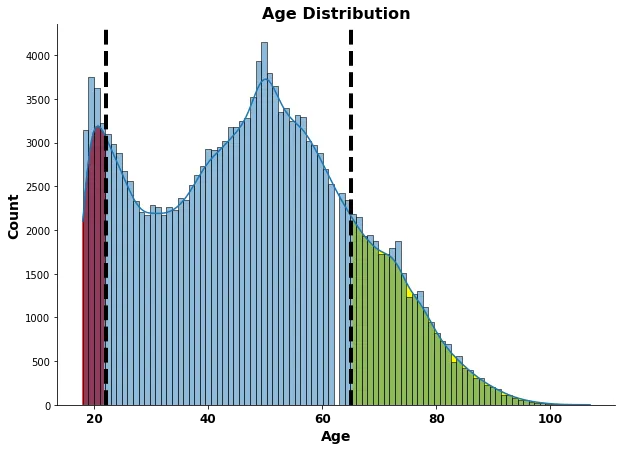

#### Cómo aplicar una función personalizada con apply()

Podría tener sentido dividir a nuestros votantes registrados en generaciones en función de su año de nacimiento, ya que a menudo parece que eso está muy relacionado con la política de una persona. Una forma de hacerlo es escribir nuestra propia función personalizada que delinee los puntos de corte para cada generación.

A continuación se muestra una forma en que podríamos escribir dicha función personalizada:

In [16]:
def get_gen_grp(birth_year):
    
    if birth_year < 1946:
        return 'Greatest-Silent'
    
    elif (birth_year > 1945) & (birth_year < 1965):
        return 'Boomer'
    
    elif (birth_year > 1964) & (birth_year < 1981):
        return 'GenX'
    
    elif (birth_year > 1980) & (birth_year < 1997):
        return 'Millennial'
    
    elif birth_year > 1996:
        return 'GenZ'
    
    else:
        return 'Missing'

Y luego usa Pandas apply()para crear una nueva característica basada en la birth_yearvariable original:

In [18]:
df['generation'] = df['birth_year'].apply(get_gen_grp)
df

,name,age,birth_year,first_pres_elec,senior,generation
0,Alice,21,2003,1,0,GenZ
1,Bob,23,2001,0,0,GenZ
2,Charlie,20,2004,1,0,GenZ
3,David,25,1999,0,0,GenZ
4,Julian,65,1959,0,1,Boomer
5,Eva,67,1957,0,1,Boomer
6,Leon,70,1954,0,1,Boomer
7,Charlize,55,1969,0,0,GenX


Ahora nuestros votantes registrados están divididos en cinco categorías discretas y significativas. Decidí combinar las dos generaciones más antiguas (la generación más grande y la generación silenciosa) para no crear dos categorías raras que conforman cada una solo una porción muy pequeña de la población.

#### Diagrama de recuento de Seaborn que muestra la distribución de votantes por generación 

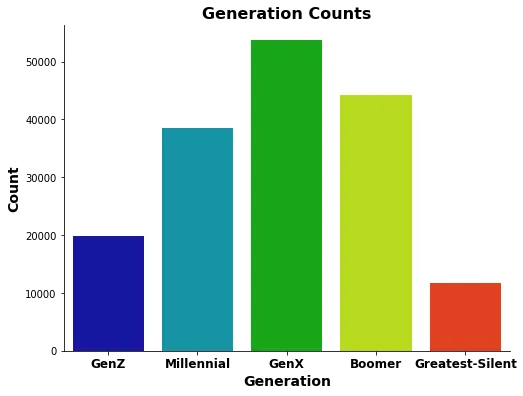

#### Definición de contenedores con pd.cut()

También podemos crear los mismos contenedores de generación pd.cut()en lugar de escribir nuestra propia función y aplicarla. Aún tendremos que definir las etiquetas adecuadas para cada grupo, así como los bordes de los contenedores (años de nacimiento recortados).

In [22]:

## Bin registered voters into generation groups using pd.cut
# Define group labels
cut_labels = ['Greatest-Silent', 'Boomer', 'GenX', 'Millennial', 'GenZ']

# Define bin edges
cut_bins = [0, 1945, 1964, 1980, 1996, 2100]

# Create a new column grouping birth_year into generations
df['cut_generation'] = pd.cut(df['birth_year'], bins=cut_bins, labels=cut_labels)
df

,name,age,birth_year,first_pres_elec,cut_generation
0,Alice,21,2003,1,GenZ
1,Bob,23,2001,0,GenZ
2,Charlie,20,2004,1,GenZ
3,David,25,1999,0,GenZ
4,Julian,65,1959,0,Boomer
5,Eva,67,1957,0,Boomer
6,Leon,70,1954,0,Boomer
7,Charlize,55,1969,0,GenX


En la última línea, creamos nuestra nueva función proporcionando pd.cut()la columna que queremos agrupar en categorías, los contenedores que queremos y cómo etiquetar cada categoría agrupada.

En lugar de agrupar por generación, podríamos crear rápidamente un rango y proporcionarlos como bordes de los contenedores. Por ejemplo, si pensamos que sería significativo agrupar por edad por década, podríamos lograrlo de la siguiente manera:

In [25]:

## Bin registered voters into generation groups using pd.cut
# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins)
df

,name,age,birth_year,first_pres_elec,cut_generation,cut_age
0,Alice,21,2003,1,GenZ,"(20, 30]"
1,Bob,23,2001,0,GenZ,"(20, 30]"
2,Charlie,20,2004,1,GenZ,"(10, 20]"
3,David,25,1999,0,GenZ,"(20, 30]"
4,Julian,65,1959,0,Boomer,"(60, 70]"
5,Eva,67,1957,0,Boomer,"(60, 70]"
6,Leon,70,1954,0,Boomer,"(60, 70]"
7,Charlize,55,1969,0,GenX,"(50, 60]"


La primera línea define un rango que comienza en 10 y continúa hasta 110 (sin incluirlo), aumentando de a 10 en cada paso. La segunda línea utiliza ese rango como límites de intervalo para discretizar a los votantes registrados por edad en los siguientes grupos:

#### Recuento bruto y porcentaje de votantes registrados clasificados según la edad en décadas

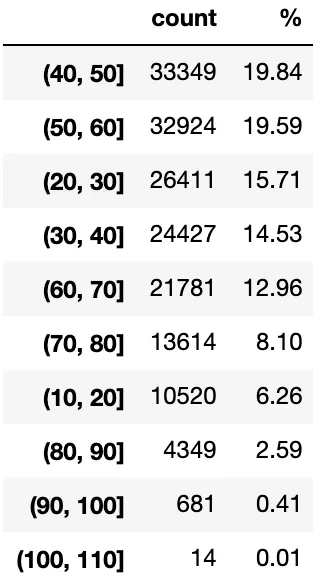

La primera fila muestra que 33.349 o el 19,84% de nuestros votantes tienen entre 40 y 49 años. El paréntesis indica que el 40 es inclusivo, mientras que el corchete indica que el 50 está excluido del grupo. Para hacer un seguimiento más fácil de lo que significa cada grupo, podríamos introducir las siguientes etiquetas pd.cut():

In [23]:

## Bin registered voters into generation groups using pd.cut
# Define group labels
cut_labels = ['Teens', "20's", "30's", "40's", "50's", "60's", "70's", "80's", "90's", "100's"]

# Define bin edges
cut_bins = np.arange(10, 111, 10)

# Create a new column grouping birth_year into generations
df['cut_age'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)
df

,name,age,birth_year,first_pres_elec,cut_generation,cut_age
0,Alice,21,2003,1,GenZ,20's
1,Bob,23,2001,0,GenZ,20's
2,Charlie,20,2004,1,GenZ,Teens
3,David,25,1999,0,GenZ,20's
4,Julian,65,1959,0,Boomer,60's
5,Eva,67,1957,0,Boomer,60's
6,Leon,70,1954,0,Boomer,60's
7,Charlize,55,1969,0,GenX,50's


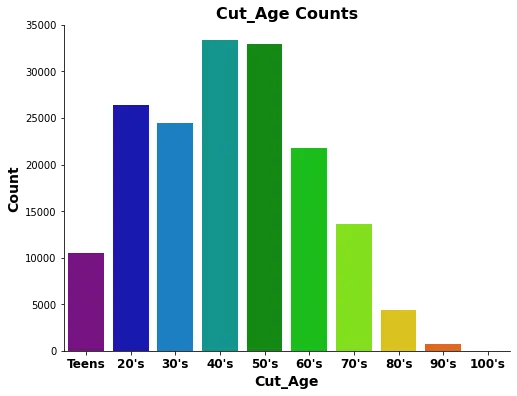

#### Recordar

Cubrimos:

- Qué significa clasificar las características numéricas
- 1 método para crear un indicador de umbral ( np.where())
- 2 métodos para agrupar características numéricas (función personalizada con Pandas apply()y definición de bordes de agrupamiento con pd.cut())